# Рубежный контроль №1

## Тема: Разведочный анализ и подготовка данных.

## Вариант 2

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

# Ход выполнения работы

Импорт всех необходимых пакетов:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('data/BlackFriday.csv', sep=",")

In [3]:
# Первые 5 строк датасета
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Размер датасета - 537577 строк, 12 колонок
data.shape

(537577, 12)

In [5]:
# Список колонок с типами данных
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

User_ID - 0
Product_ID - 0
Gender - 0
Age - 0
Occupation - 0
City_Category - 0
Stay_In_Current_City_Years - 0
Marital_Status - 0
Product_Category_1 - 0
Product_Category_2 - 166986
Product_Category_3 - 373299
Purchase - 0


В столбцах 
- Product_Category_2 - 166986
- Product_Category_3 - 373299
много пустых значений. Проведем обработку пропусков.

In [7]:
# проверим есть ли пропущенные значения 2 способ
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:

# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((537577, 12), (537577, 10))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((537577, 12), (164278, 12))

# Просматривает data_Set полсде удаления  пустые столбцов

In [10]:
data_new_1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [11]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data_new_1.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

User_ID - 0
Product_ID - 0
Gender - 0
Age - 0
Occupation - 0
City_Category - 0
Stay_In_Current_City_Years - 0
Marital_Status - 0
Product_Category_1 - 0
Purchase - 0


# Просматривает data_Set полсде удаления  пустые строк


In [12]:
data_new_2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [13]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data_new_2.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data_new_2[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

c:\users\дмитрий\documents\virtualenv\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


User_ID - 0
Product_ID - 0
Gender - 0
Age - 0
Occupation - 0
City_Category - 0
Stay_In_Current_City_Years - 0
Marital_Status - 0
Product_Category_1 - 0
Product_Category_2 - 0
Product_Category_3 - 0
Purchase - 0


In [14]:
# проверим есть ли пропущенные значения 2 способ
data_new_2.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# 1.2.2. Обработка пропусков в категориальных данных

In [15]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

# ПУстых значений к сожалению нет

# Заполним ПУстых значений 0

In [16]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [17]:

total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 537577


In [18]:

# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Product_Category_2. Тип данных float64. Количество пустых значений 166986, 31.06%.
Колонка Product_Category_3. Тип данных float64. Количество пустых значений 373299, 69.44%.


In [19]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
5,2.0,NaN
6,8.0,17.0
7,15.0,NaN
8,16.0,NaN
9,NaN,NaN


c:\users\дмитрий\documents\virtualenv\tensorflow\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\дмитрий\documents\virtualenv\tensorflow\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


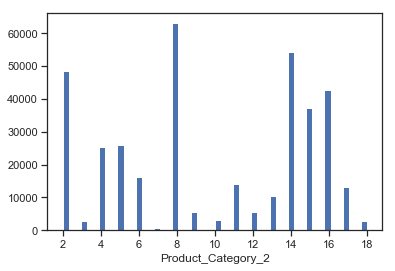

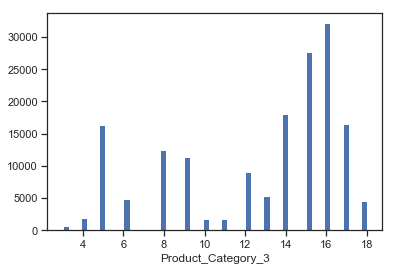

In [20]:

# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [21]:
# Фильтр по пустым значениям поля Product_Category_3
data[data['Product_Category_3'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,NaN,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [22]:


# Фильтр по пустым значениям поля Product_Category_2 
data[data['Product_Category_2'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,NaN,NaN,9743
23,1000008,P00214442,M,26-35,12,C,4+,1,8,NaN,NaN,5982
26,1000009,P00039942,M,26-35,17,C,0,0,8,NaN,NaN,5887


In [23]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Product_Category_2'].isnull()].index
flt_index

Int64Index([     0,      2,      4,      9,     11,     12,     21,     22,
                23,     26,
            ...
            537532, 537540, 537548, 537550, 537557, 537563, 537565, 537566,
            537568, 537575],
           dtype='int64', length=166986)

In [24]:

# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,NaN,NaN,9743
23,1000008,P00214442,M,26-35,12,C,4+,1,8,NaN,NaN,5982
26,1000009,P00039942,M,26-35,17,C,0,0,8,NaN,NaN,5887


In [25]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Product_Category_2']

0        NaN
2        NaN
4        NaN
9        NaN
11       NaN
12       NaN
21       NaN
22       NaN
23       NaN
26       NaN
31       NaN
32       NaN
34       NaN
35       NaN
40       NaN
45       NaN
61       NaN
63       NaN
70       NaN
86       NaN
91       NaN
92       NaN
96       NaN
104      NaN
106      NaN
109      NaN
110      NaN
124      NaN
130      NaN
131      NaN
          ..
537456   NaN
537457   NaN
537459   NaN
537462   NaN
537468   NaN
537477   NaN
537483   NaN
537484   NaN
537485   NaN
537491   NaN
537492   NaN
537494   NaN
537496   NaN
537500   NaN
537504   NaN
537505   NaN
537506   NaN
537512   NaN
537513   NaN
537525   NaN
537532   NaN
537540   NaN
537548   NaN
537550   NaN
537557   NaN
537563   NaN
537565   NaN
537566   NaN
537568   NaN
537575   NaN
Name: Product_Category_2, Length: 166986, dtype: float64

In [35]:

data_num_Product_Category_2 = data_num[['Product_Category_2']]
data_num_Product_Category_2.head()

,Product_Category_2
0,NaN
1,6.0
2,NaN
3,14.0
4,NaN


In [36]:

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [39]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Product_Category_2)
mask_missing_values_only

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [40]:

strategies=['mean', 'median','most_frequent']

In [41]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [42]:

strategies[0], test_num_impute(strategies[0])

('mean',
 array([9.84214403, 9.84214403, 9.84214403, ..., 9.84214403, 9.84214403,
        9.84214403]))

In [43]:

strategies[1], test_num_impute(strategies[1])

('median', array([9., 9., 9., ..., 9., 9., 9.]))

In [44]:

strategies[2], test_num_impute(strategies[2])

('most_frequent', array([8., 8., 8., ..., 8., 8., 8.]))

In [45]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [46]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Product_Category_2']

0        NaN
2        NaN
4        NaN
9        NaN
11       NaN
12       NaN
21       NaN
22       NaN
23       NaN
26       NaN
31       NaN
32       NaN
34       NaN
35       NaN
40       NaN
45       NaN
61       NaN
63       NaN
70       NaN
86       NaN
91       NaN
92       NaN
96       NaN
104      NaN
106      NaN
109      NaN
110      NaN
124      NaN
130      NaN
131      NaN
          ..
537456   NaN
537457   NaN
537459   NaN
537462   NaN
537468   NaN
537477   NaN
537483   NaN
537484   NaN
537485   NaN
537491   NaN
537492   NaN
537494   NaN
537496   NaN
537500   NaN
537504   NaN
537505   NaN
537506   NaN
537512   NaN
537513   NaN
537525   NaN
537532   NaN
537540   NaN
537548   NaN
537550   NaN
537557   NaN
537563   NaN
537565   NaN
537566   NaN
537568   NaN
537575   NaN
Name: Product_Category_2, Length: 166986, dtype: float64

NameError: name 'test_num_impute_col' is not defined

In [49]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [50]:
test_num_impute_col(data, 'Product_Category_2', strategies[0])

('Product_Category_2', 'mean', 166986, 9.842144034798471, 9.842144034798471)

In [51]:
test_num_impute_col(data, 'Product_Category_2', strategies[1])

('Product_Category_2', 'median', 166986, 9.0, 9.0)

In [52]:
test_num_impute_col(data, 'Product_Category_2', strategies[2])

('Product_Category_2', 'most_frequent', 166986, 8.0, 8.0)